<a href="https://colab.research.google.com/github/rithika20252024/Heart-Disease-Prediction-system/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip list


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import svm
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,LSTM
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras import callbacks
from sklearn.metrics  import precision_score,recall_score,confusion_matrix,accuracy_score,f1_score,classification_report

In [ ]:
data_df=pd.read_csv('heart_failure.csv')

In [ ]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


/tmp/ipython-input-111-1226549943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data_df['DEATH_EVENT'],palette=cols)


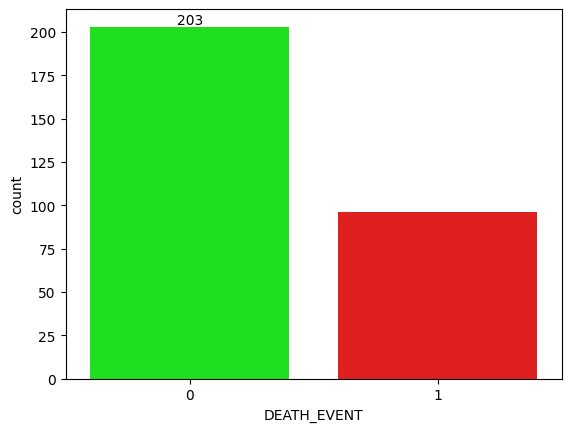

In [ ]:
cols=["#00FF00","#FF0000"]
ax=sns.countplot(x=data_df['DEATH_EVENT'],palette=cols)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


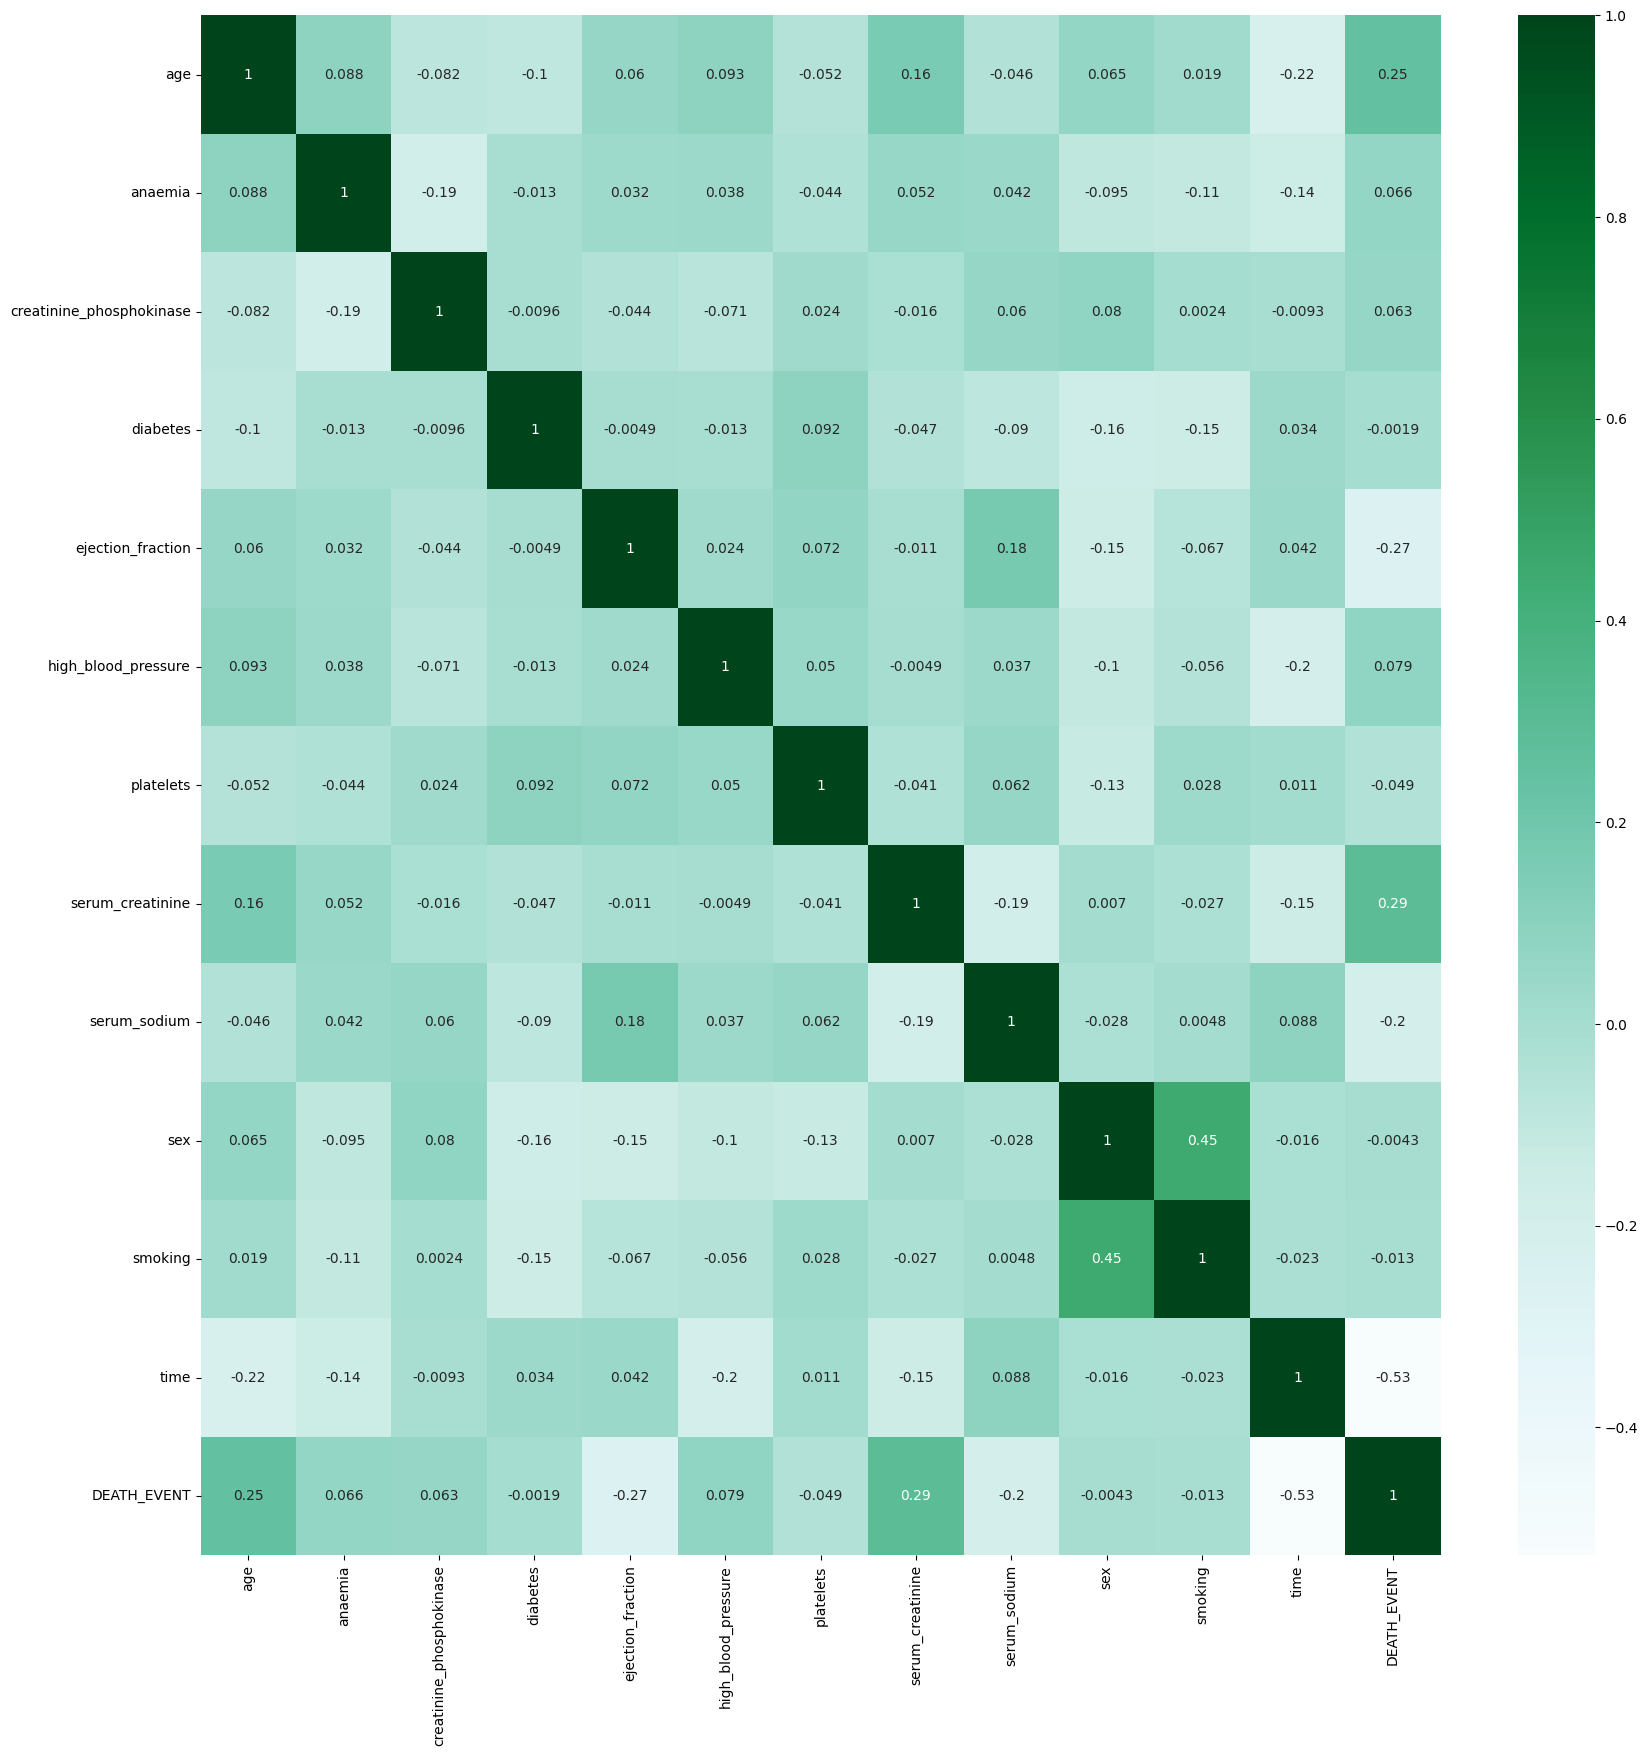

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(),cmap="BuGn",annot=True)
plt.show()

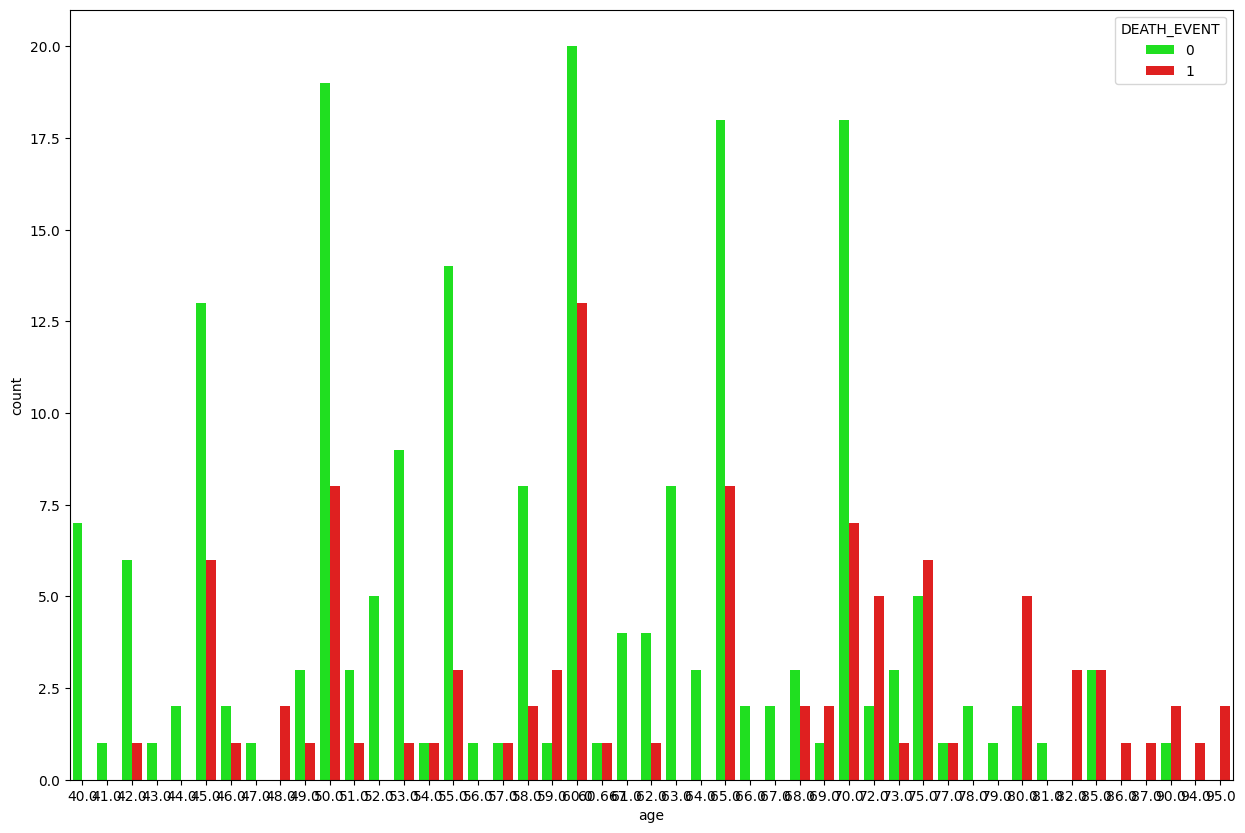

In [ ]:
plt.figure(figsize=(15,10))
days=sns.countplot(x=data_df['age'],data=data_df,hue='DEATH_EVENT',palette=cols)


/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)


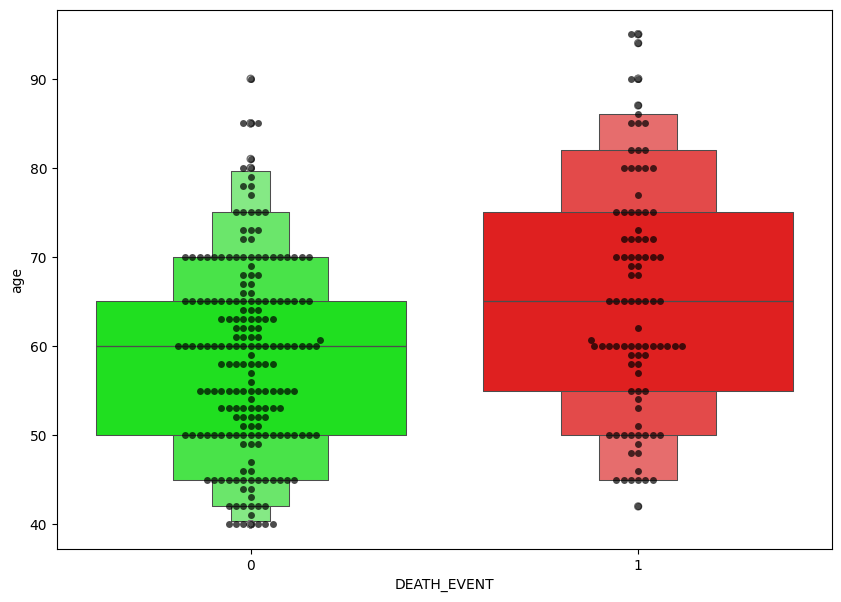

/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


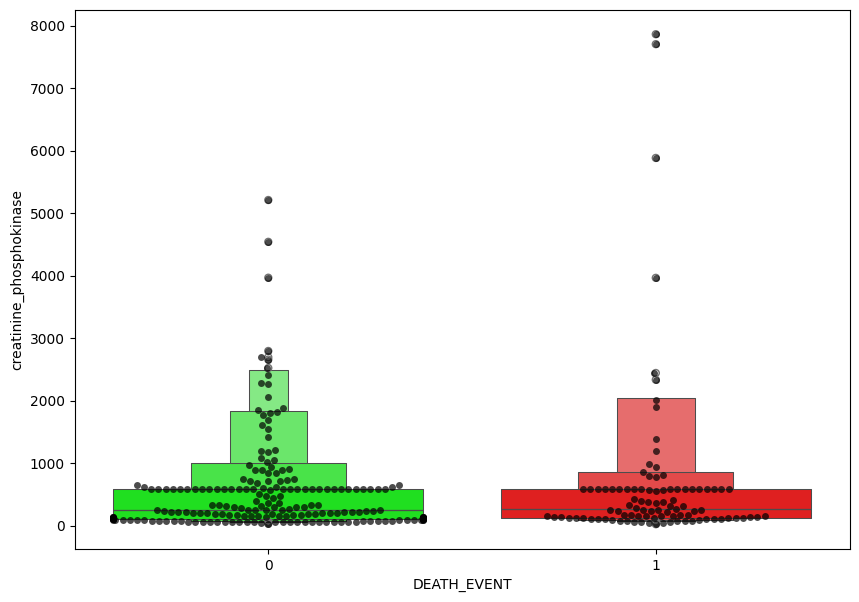

/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)


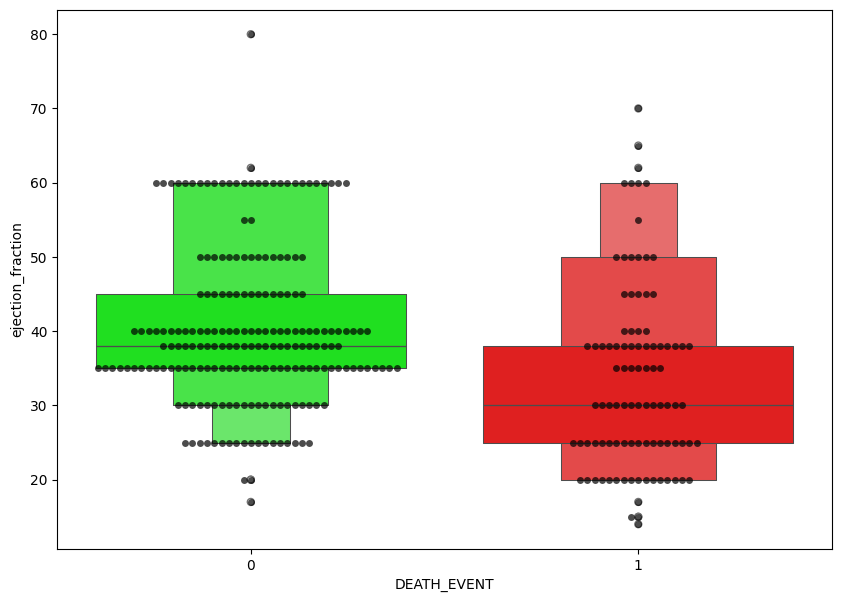

/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)


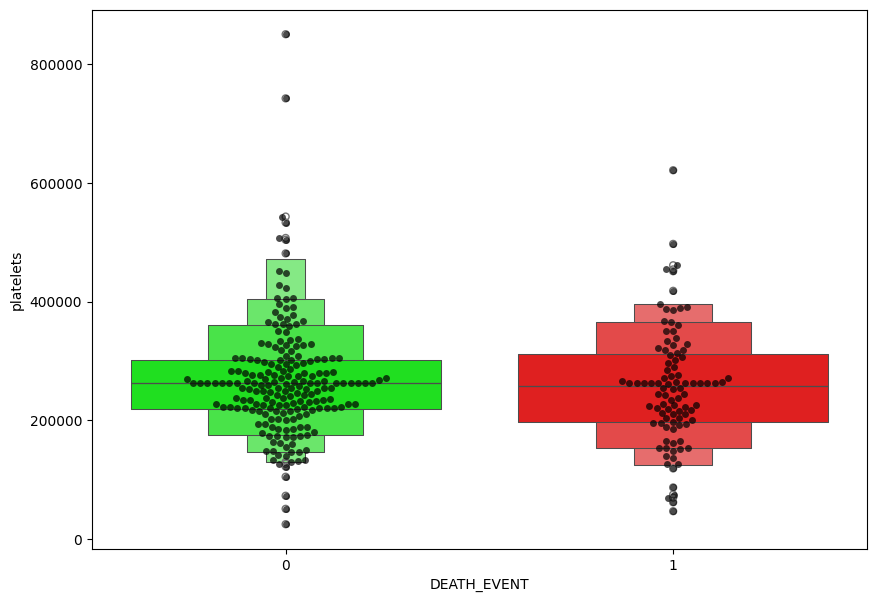

/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


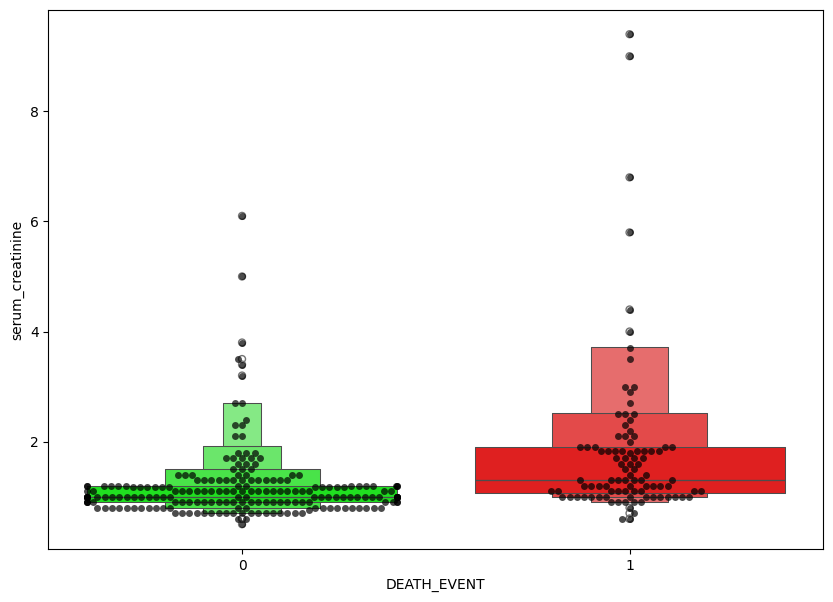

/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)


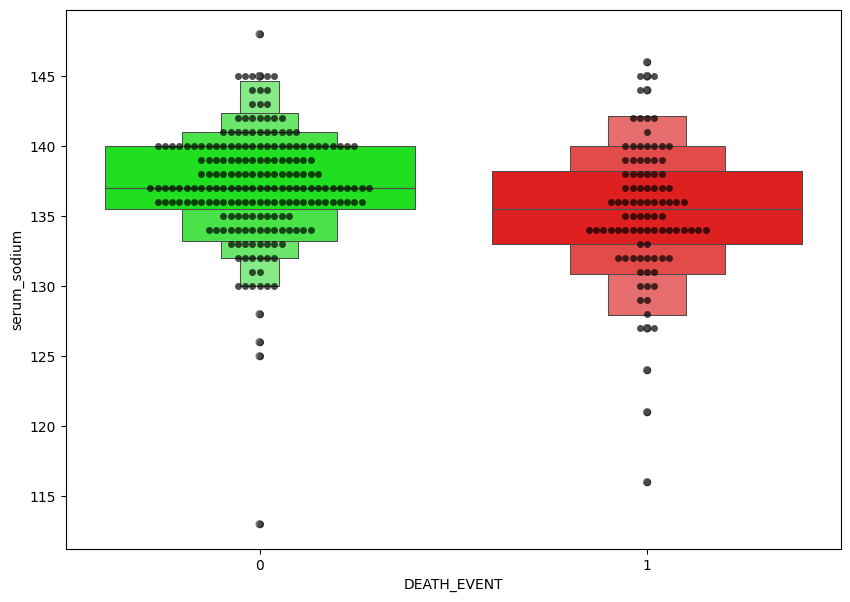

/tmp/ipython-input-115-2304702810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)


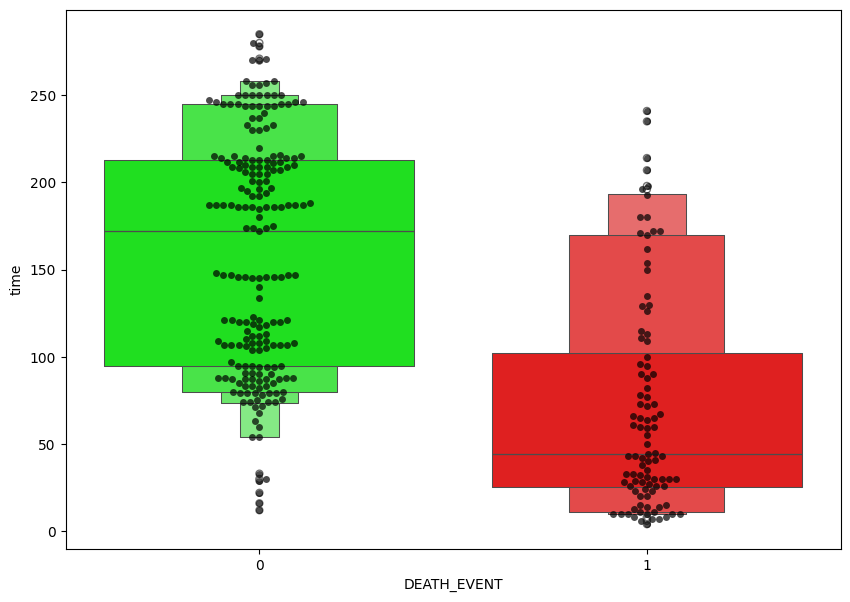

In [ ]:
feature=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df['DEATH_EVENT'],y=data_df[i],color='black',alpha=0.7)
    sns.boxenplot(x=data_df['DEATH_EVENT'],y=data_df[i],palette=cols)
    plt.show()

In [ ]:
x=data_df.drop(['DEATH_EVENT'],axis=1)
y=data_df['DEATH_EVENT']

In [ ]:
col_name=list(x.columns)
s_scaler=preprocessing.StandardScaler()
x_scaled=s_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=col_name)

In [ ]:
x_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<Axes: >

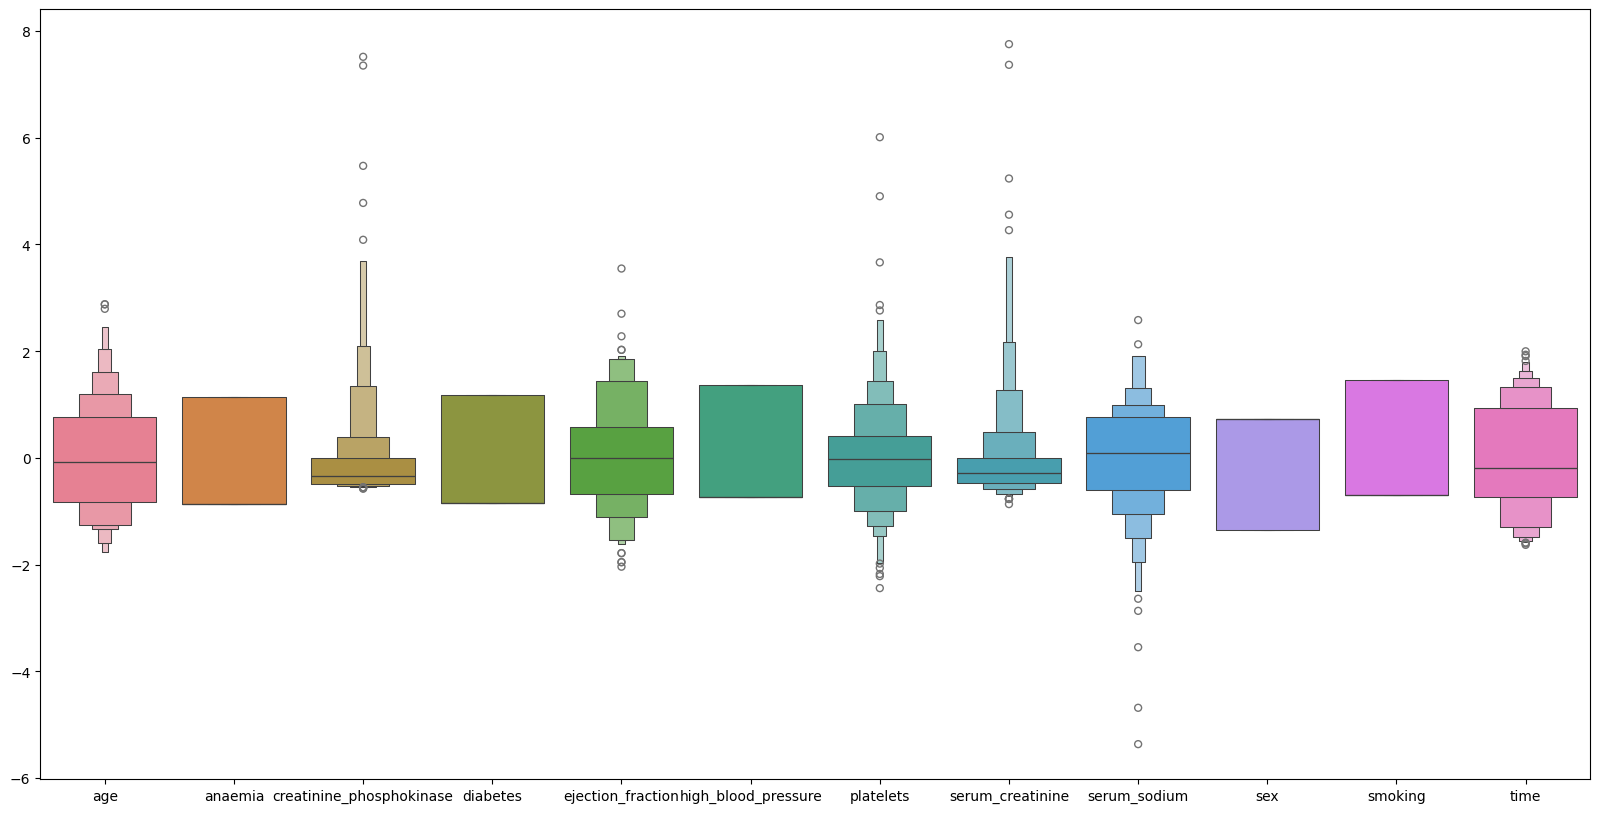

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled)

In [ ]:
x_train,x_tests,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [ ]:
model1=svm.SVC()
model1.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model1.predict(x_tests)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0])

In [ ]:
y_test

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0
...,...
132,0
72,1
15,1
10,1


In [ ]:
y_train


,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1
...,...
188,0
71,0
106,0
270,0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        53
           1       0.83      0.54      0.66        37

    accuracy                           0.77        90
   macro avg       0.79      0.73      0.74        90
weighted avg       0.78      0.77      0.75        90



In [ ]:
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,patience=20,restore_best_weights=True
)
model=Sequential()
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train,y_train,batch_size=25,epochs=100,callbacks=[early_stopping],validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6241 - loss: 0.6928 - val_accuracy: 0.7170 - val_loss: 0.6917
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7018 - loss: 0.6915 - val_accuracy: 0.7170 - val_loss: 0.6902
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7182 - loss: 0.6899 - val_accuracy: 0.7170 - val_loss: 0.6886
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6822 - loss: 0.6889 - val_accuracy: 0.7170 - val_loss: 0.6870
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7114 - loss: 0.6866 - val_accuracy: 0.7170 - val_loss: 0.6854
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7187 - loss: 0.6848 - val_accuracy: 0.7170 - val_loss: 0.6835
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7135 - loss: 0.6830 - val_accuracy: 0.7170 - val_loss: 0.6814
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7116 - loss: 0.6810 - val_accuracy: 0.7170 - val_loss:

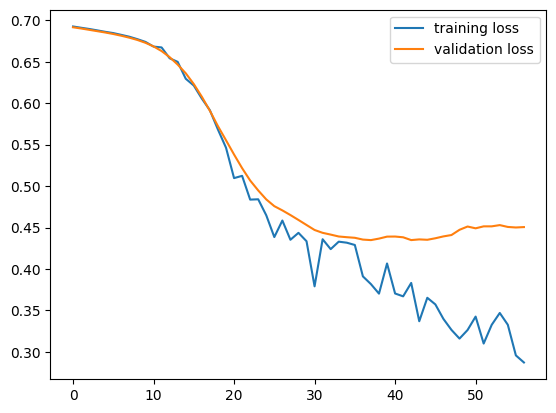

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label='training loss')
plt.plot(history_df.loc[:,['val_loss']],label='validation loss')
plt.legend()
plt.show()

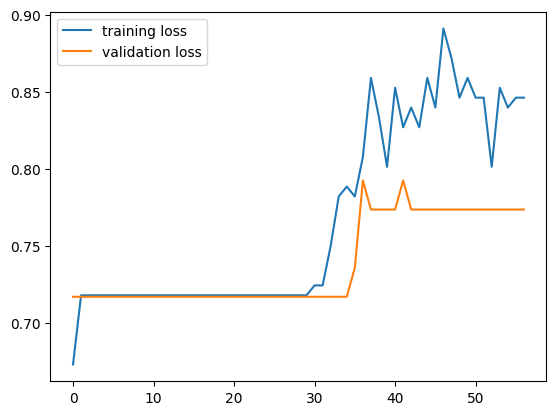

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['accuracy']],label='training loss')
plt.plot(history_df.loc[:,['val_accuracy']],label='validation loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_tests)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.96      0.78        53
           1       0.83      0.27      0.41        37

    accuracy                           0.68        90
   macro avg       0.74      0.62      0.59        90
weighted avg       0.73      0.68      0.63        90

